In [51]:
import numpy as np 
import time 
import matplotlib.pyplot as plt 
from scipy.spatial import distance 

In [60]:
%matplotlib notebook

class Const:
    def __init__(self):
        self.n_animals_max = 100
        self.n_animals_start = 50 #Original n_animals 
        self.n_steps = 100
        self.vmin = 0.01
        self.vmax = 0.05
        
        self.hp_baby = 10
        self.hp_food = 5
        self.hp_reproduction= 30
        self.hp_birthcost = 10
        self.hp_leak = 1 
        
        self.food_rate = 1 
        self.eating_distance = 0.03
        self.n_food_max = 1000
        self.n_food_start = 20
        
        

In [76]:
def model(c,show_dotses = False,n_trials = 1):
    history = np.zeros((c.n_steps,n_trials))

    for i_trial in range(n_trials):
        hp = np.zeros(c.n_animals_max)
        hp[: c.n_animals_start] = np.random.uniform(low =c.hp_baby, high= c.hp_reproduction, size = c.n_animals_start)
        
        x = np.random.uniform(size=c.n_animals_max)
        y = np.random.uniform(size=c.n_animals_max)
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        
        n_animals = np.zeros(c.n_steps)
        
        #Let there be cabbage 
        foodx = np.ones(c.n_food_max)*-1
        foodx[:c.n_food_start] = np.random.uniform(size = c.n_food_start)
        #Y doesn't matter since x = -1 is enough to move cabbage out of this word 
        foody= np.random.uniform(size= c.n_food_max)
        
        

        if show_dotses: # Plotting Preparation 
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots actually, just creating axes
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy

            # Reflect from the walls
            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
            
            
            
            for i_animal in range (c.n_animals_max):
                if hp[i_animal]<=0: #Skip dead animals 
                    continue  
                
                d = np.sqrt((x[i_animal]-foodx)**2 + (y[i_animal]-foody)**2)
                                           
                eaten_food = d < c.eating_distance
                foodx[eaten_food]= -1
                hp[i_animal] += c.hp_food *sum(eaten_food)
                
   
            
            #Let Cabbage Grow
            potential_cabbage = np.argwhere(foodx<=0)
            
            if potential_cabbage.size != 0:
                foodx[potential_cabbage[0]]= np.random.uniform()
                foody[potential_cabbage[0]]= np.random.uniform()
            
            hp -= c.hp_leak
                                       
            n_animals[t] = np.sum(hp>0) #TODO MAKE THIS WORK 
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[hp>0], y[hp>0], 'k.',markersize=5);
                plt.plot(foodx,foody,'r.', markersize = 2)
                #plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # <--------------- The main command to make it move

        history[:,i_trial] = n_animals 
        
    return np.mean(history,axis=1)

In [70]:
# Main program

c = Const()
curve1 = model(c, n_trials=100)
#curve2 = model(c, n_trials=100)

plt.figure()
plt.plot(curve1, label='Bunnies');
#plt.plot(curve2, label='Center trap');
plt.xlabel('Steps');
plt.ylabel('number of alive bunnies');
plt.legend(loc='lower right');


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


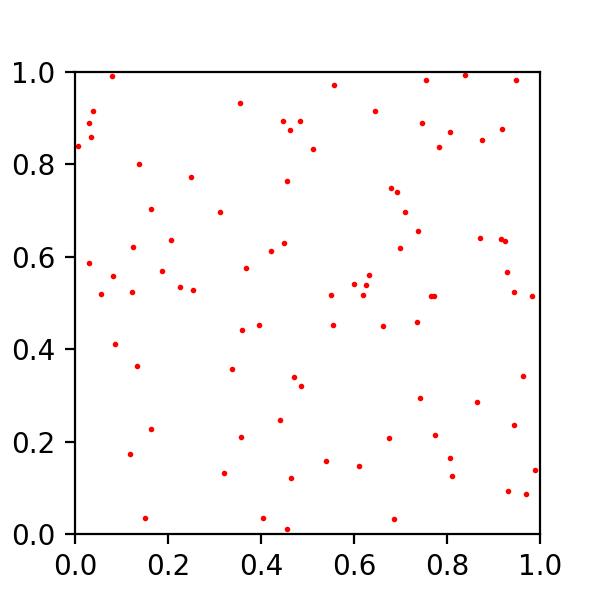

In [77]:

c = Const()
model(c,True);